<a href="https://colab.research.google.com/github/Mohanskm/Sentiment/blob/main/DL(PRAC_1)BUILDING_A_DIGIT_CLASSIFIER_USING_DEEP_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


In [ ]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape data to flatten images (28x28 -> 784)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Create model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 15s 9ms/step - loss: 0.2894 - accuracy: 0.9169 - val_loss: 0.1663 - val_accuracy: 0.9526
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1293 - accuracy: 0.9623 - val_loss: 0.1101 - val_accuracy: 0.9663
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0880 - accuracy: 0.9738 - val_loss: 0.1011 - val_accuracy: 0.9697
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0647 - accuracy: 0.9802 - val_loss: 0.0911 - val_accuracy: 0.9725
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0498 - accuracy: 0.9847 - val_loss: 0.0899 - val_accuracy: 0.9730
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0397 - accuracy: 0.9876 - val_loss: 0.0993 - val_accuracy: 0.9722
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0296 - accuracy: 0.9909 - val_loss: 0.0876 - val_accurac

313/313 [==============================] - 1s 2ms/step - loss: 0.0756 - accuracy: 0.9788
Test accuracy: 0.9787999987602234


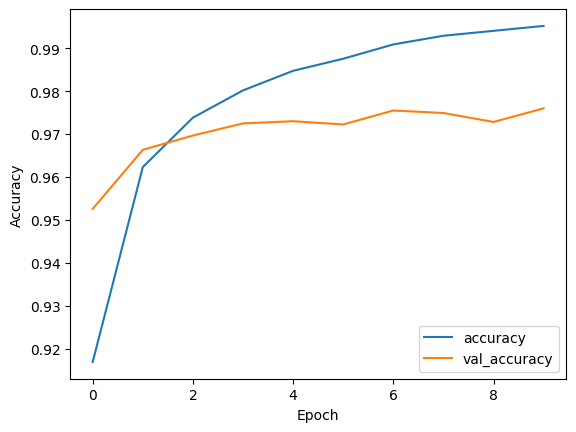

In [ ]:
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


313/313 [==============================] - 1s 2ms/step


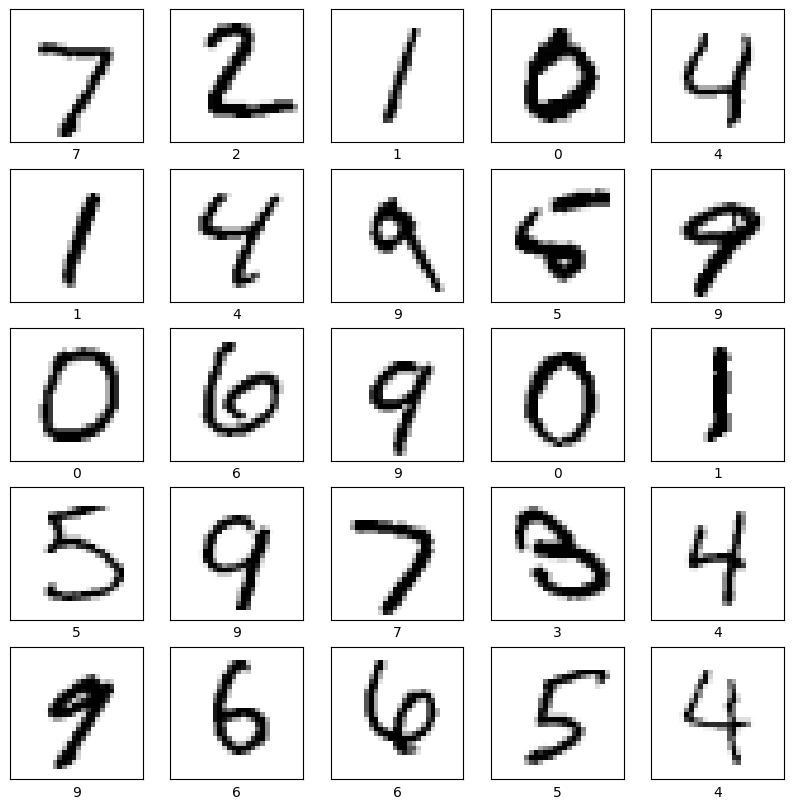

In [ ]:
# Make predictions
predictions = model.predict(x_test)

# Visualize sample predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(np.argmax(predictions[i]))
plt.show()
